(This is a tutorial worksheet in an introductory mathematical computing class in which prompts were given and we were expected to write our own code.)

The [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) are a sequence of numbers which can be generated by a recurrence relation, 
The sequence is 

$$0,\,1,\,1,\,2,\,3,\,5,\,8,\,13,\,21 \dots $$

i.e. $F_0=0,$ $F_1=1,$ and thereafter $F_{n+1} = F_n + F_{n-1}.$ 


Create a numpy array of integer type, name it `fib50`, and use a for loop to store the first 50 terms of the Fibonacci sequence in it, including $F_0.$ 

In [29]:
import numpy as np

fib50 = np.zeros(50, dtype=np.int64)

fib50[0]=0
fib50[1]=1

for i in range(2,50):
    fib50[i]=fib50[i-2]+fib50[i-1]
    
fib50[-1]  

7778742049

It can be shown that the ratio of Fibonacci numbers tends to the golden ratio, i.e.

$$ \lim_{n\to\infty} \frac{F_{n+1}}{F_n} = \phi = \frac{1+\sqrt{5}}{2}$$

After how many terms does difference between $\frac{F_{n+1}}{F_n}$ and $\phi$ fall below machine precision? Store the smallest number $M$ such that $|\phi - \frac{F_{M+1}}{F_M}|$ is below machine precision in a Python variable `itFinal` and store the final *non-zero* error $\left|\phi-\frac{F_{M}}{F_{M-1}}\right|$ in a Python variable `errFinal

In [30]:
import numpy as np

phi=(1+np.sqrt(5))/2

itFinal=0

for i in range(1,50):
    if abs(phi-(fib50[i+1]/fib50[i]))>1.e-16:
        itFinal=i+1
    else:
        break

errFinal=abs(phi-fib50[itFinal]/fib50[itFinal-1])

itFinal, errFinal

(40, 2.220446049250313e-16)

Eventually the additions in the recurrence relation result in overflow. 

What is the largest $n$ for which $F_n$ can be computed using an array of numpy integers? What about floats?

Store the value for integers in a variable `maxInt` and floats `maxFloat` (note that these variables should contain the largest $n$ for which $F_n$ can be computed *before* the overflow occurs)

In [31]:
#can just use trial and error

n=93

fib50 = np.zeros(n, dtype=int)

fib50[0]=0
fib50[1]=1

for i in range(2,n):
    fib50[i]=fib50[i-2]+fib50[i-1]
    
fib50[-1]

#tried 2000 and encountered overflow
#tried 1500 and encountered overflow
#tried 1000 and encountered overflow
#tried 500 and encountered overflow
#tried 100 and encountered overflow
#tried 75 and no error
#tried 90 and no error
#tried 95 and encountered overflow
#tried 94 and encountered overflow
#tried 93 and no error

maxInt=n-1

xn=1477

xfib50 = np.zeros(xn, dtype=float)

xfib50[0]=0
xfib50[1]=1

for i in range(2,xn):
    xfib50[i]=xfib50[i-2]+xfib50[i-1]
    
xfib50[-1]

#tried 2000 and encountered overflow
#tried 1500 and encountered overflow
#tried 1000 and no error
#tried 1400 and no error
#tried 1450 and no error
#tried 1475 and no error
#tried 1480 and encountered overflow
#tried 1477 and no error
#tried 1478 and encountered overflow

maxFloat=xn-1

maxInt, maxFloat


C:\Users\kriti\AppData\Local\Temp\ipykernel_13660\3245203399.py:11: RuntimeWarning: overflow encountered in scalar add
  fib50[i]=fib50[i-2]+fib50[i-1]


(92, 1476)

*Binet's Formula* gives a closed-form expression for the $n^{th}$ Fibonacci number:

$$F_n = \frac{\phi^n - \psi^n}{\sqrt{5}} $$

where $\phi = \frac{1+\sqrt{5}}{2}$ and $\psi = \frac{1-\sqrt{5}}{2}.$

Create a function `Binet(n)` which returns the Binet formula for a given input `n`, making sure to return an integer type. 

In [32]:
phi=(1+np.sqrt(5))/2
psi=(1-np.sqrt(5))/2

def Binet(n):
    Fn=(phi**n - psi**n)/np.sqrt(5)
    return(int(Fn))

Binet(50)

12586269025

We have now seen how to use loops and Binet's formula to compute the Fibonacci numbers, however there are alternative methods which have differing computational complexity.
    
One alternative is to notice that the recurrence relation above can be expressed
    
$$\left(\begin{array}{c} F_{n+1} \\ F_{n}\end{array}\right) = \left(\begin{array}{cc}1 & 1 \\ 1 & 0\end{array}\right)\left(\begin{array}{c} F_{n} \\ F_{n-1}\end{array}\right) \qquad \Rightarrow \qquad \left(\begin{array}{c} F_{n+1} \\ F_{n}\end{array}\right) = \left(\begin{array}{cc}1 & 1 \\ 1 & 0\end{array}\right)^n\left(\begin{array}{c} F_{1} \\ F_{0}\end{array}\right) $$
    
    
and therefore with $ \left(\begin{array}{c} F_{1} \\ F_{0}\end{array}\right) = \left(\begin{array}{c}1 \\ 0\end{array}\right), $  

$$\left(\begin{array}{cc}1 & 1 \\ 1 & 0\end{array}\right)^n =\left(\begin{array}{cc}F_{n+1} & F_n \\ F_n & F_{n-1}\end{array}\right) $$

The function `np.linalg.matrix_power` provides an efficient way to obtain powers via a form of [exponentiation by squaring](https://en.wikipedia.org/wiki/Exponentiation_by_squaring) meaning that we can expect the complexity to be $\mathcal{O}(\log(N)$

In addition to the function `Binet(n)` from week 2, create two other Python functions  `fibIter(n)` which computes the $n^{th}$ Fibonacci number by iteration and `fibMatP(n)` which computes the same by matrix power. Your function should return only the $n^{th}$ number.

In [34]:
import numpy as np

# Binet function from tutorial 2

phi=(1+np.sqrt(5))/2
psi=(1-np.sqrt(5))/2

def Binet(n):
    Fn=(phi**n - psi**n)/np.sqrt(5)
    return(int(Fn))

# Iteration function

def fibIter(n):
    fibN_first=0
    fibN_second=1
    if n==0:
        return(fibN_first)
    elif n==1:
        return(fibN_second)
    else:
        for i in range(2,n+1):
            fibN_final=fibN_first+fibN_second
            fibN_first=fibN_second
            fibN_second=fibN_final
        return (fibN_final)

# Matrix power function 

from numpy.linalg import matrix_power

def fibMatP(n):
    A = [[1,1],[1,0]]
    AN = matrix_power(A,n)
    return(AN[0][1])

Binet(50), fibIter(50), fibMatP(50)

(12586269025, 12586269025, -298632863)

When timing a function or code chunk we need to be careful to use an appropriate measure. Simply starting/stopping a stopwatch provides the [*wall-time*](https://en.wikipedia.org/wiki/Elapsed_real_time) which is unreliable as it does not account for the time the processor(s) spent actively working on your code; if the system is shared with other users (like JupyterHub) this time is dependent on the occupancy of the server. What we really want is the [*CPU-time*](https://en.wikipedia.org/wiki/CPU_time) which measures the time spent the CPU spends on a particular process. 
    
As we saw in the lecture on good practise and efficiency, in Jupyter notebooks we can use the [*cell/line-magic*](https://thecodingbot.com/a-quick-guide-for-ipythonjupyter-magic-cells/) command, e.g. to time a function `f(x)` we can do

`%timeit f(x)`
    
or to time an entire cell we can do
    
`%%timeit`
    
as its first line.
    
These commands are very useful as they go some way to account for the statistical variations in the timing measure, as you will see, however they are limited to Jupyter notebooks and they do not allow for data to be returned to the code about the timing. 

An alternative which is slightly more general is to import `process_time()` from the `time` module, this is used like a stopwatch with [a start and stop call required to get the elapsed time](https://docs.python.org/3/library/time.html#time.process_time). As it doesn't account for the variability of the measure you may find it necessary to repeat your calculation several times to obtain an average. Short codes are sensitive to overheads associated with shuffling data between different parts of memory.

Using `process_time()` obtain the scaling of your three functions with problem size $N.$ To do this vary $n\in[400,1400],$ in steps of 10. For each $n$ save the elapsed time to obtain $F_n$ 50 times (to reduce the variability in the timing) and make a plot of the elapsed time against $n$ with each function (and the axes) clearly labelled. 
    
Do we roughly find the expected behaviour? Write a *single sentence* comment in the markdown cell below to describe the performance of each method.

Text(0.5, 1.0, 'Scaling for Fibonacci Sequence Functions')

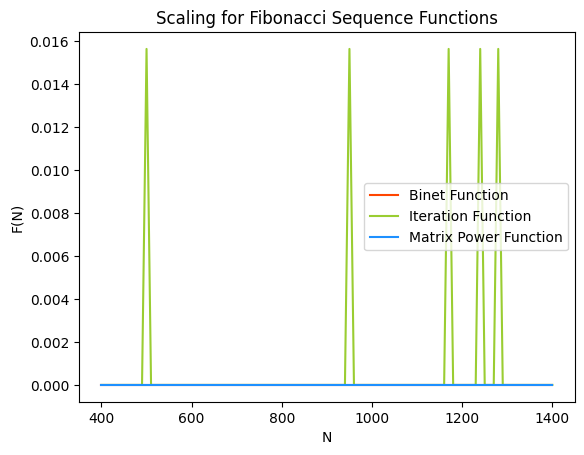

In [41]:
# Storing the times to compute for each function

from time import process_time

n_range=range(400,1401,10)

# Binet function

elapsed_Binet = []

for n in n_range:
    start = process_time()
    for i in range(50):
        Binet(n)
    stop = process_time()
    elapsed_Binet.append(stop - start)

# Iteration function 

elapsed_Iter = []

for n in n_range:
    start = process_time()
    for i in range(50):
        fibIter(n)
    stop = process_time()
    elapsed_Iter.append(stop - start)

# Matrix power function

elapsed_MatP = []

for n in n_range:
    start = process_time()
    for i in range(50):
        fibMatP
    stop = process_time()
    elapsed_MatP.append(stop - start)

# Creating the plot

import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure("Scaling Plot")

ax = fig.add_subplot(1, 1, 1)

ax.plot(n_range, elapsed_Binet, color="orangered", label="Binet Function")

ax.plot(n_range, elapsed_Iter, color="yellowgreen", label="Iteration Function")
        
ax.plot(n_range, elapsed_MatP, color="dodgerblue", label="Matrix Power Function")

ax.set_xlabel("N")

ax.set_ylabel("F(N)")

ax.legend()

ax.set_title("Scaling for Fibonacci Sequence Functions")
